# PROSPERLOAN ANALYSIS AND VISUALIZATION
 
## by OYENIYI TAOHEED

### The dataset __("prosperLoanData.csv")__ is about the loan acquisition across all the states in the united states from the year 2005 to 2014 and it contains 81 different columns.

### __DATA WRANGLING__

In [80]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [81]:
# Loading data
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [82]:
# Data description and information
print(f"Data shape: {df.shape}\n")
print(f"Data description: {df.describe()}\n")
print(f"Data info: {df.info()}")

Data shape: (113937, 81)

Data description:        ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min       

In [83]:
# Listing the columns
list(df)[:10]

['ListingKey',
 'ListingNumber',
 'ListingCreationDate',
 'CreditGrade',
 'Term',
 'LoanStatus',
 'ClosedDate',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield']

In [84]:
# Making a list of useful columns needed for our visualization.
col_list = ["ListingKey", "ListingCreationDate", "Investors", "LoanOriginationDate",
            "LoanOriginalAmount", "LoanMonthsSinceOrigination", "IncomeRange", "BorrowerState",
            "Occupation", "EmploymentStatus", "ListingCategory (numeric)", "LoanStatus", 
            "TotalProsperLoans", "OnTimeProsperPayments", "ProsperPaymentsLessThanOneMonthLate",
            "ProsperPaymentsOneMonthPlusLate", "BorrowerRate","Term"]

# The most appropriate columns(Individual Interest).
# Making a copy of the original data.
df_1 = df.copy()

# Modified data(df)
df_1 = df_1[col_list]
df_1.head()

,ListingKey,ListingCreationDate,Investors,LoanOriginationDate,LoanOriginalAmount,LoanMonthsSinceOrigination,IncomeRange,BorrowerState,Occupation,EmploymentStatus,ListingCategory (numeric),LoanStatus,TotalProsperLoans,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,BorrowerRate,Term
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,258,2007-09-12 00:00:00,9425,78,"$25,000-49,999",CO,Other,Self-employed,0,Completed,NaN,NaN,NaN,NaN,0.1580,36
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,1,2014-03-03 00:00:00,10000,0,"$50,000-74,999",CO,Professional,Employed,2,Current,NaN,NaN,NaN,NaN,0.0920,36
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,41,2007-01-17 00:00:00,3001,86,Not displayed,GA,Other,Not available,0,Completed,NaN,NaN,NaN,NaN,0.2750,36
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,158,2012-11-01 00:00:00,10000,16,"$25,000-49,999",GA,Skilled Labor,Employed,16,Current,NaN,NaN,NaN,NaN,0.0974,36
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,20,2013-09-20 00:00:00,15000,6,"$100,000+",MN,Executive,Employed,2,Current,1.0,11.0,0.0,0.0,0.2085,36


### __Dataset structure:__

- The Dataset is of shape 113937 rows and 81 columns.. Extracted just few of the most important  ones for the visualization process.

### __Main features of dataset:__

- The main features of interest in the data are ... 
    - The rate at which people borrow money.
    - The ambiguity in the interest rate of every loan(Does it really pay the borrower or add more troubles for them).
    - The main/most common reasons as to why people apply for loans.
    - The rate of ontime payment of loans and how it varies with the amount of interest rate.
### __Features that closely/mainly supports investigation of interest(s):__

- The following features should suffice:
    - LoanOriginationDate, LoanOriginalAmount, LoanMonthsSinceOrigination, IncomeRange,
    - IncomeVerifiable, Occupation, EmploymentStatus, ListingCategory (numeric),
    - LoanStatus, TotalProsperLoans, OnTimeProsperPayments, BorrowerRate, Term,
    - ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate.

### __CHECKING AND CLEANING OUR DATA__

In [85]:
df_1.head()

,ListingKey,ListingCreationDate,Investors,LoanOriginationDate,LoanOriginalAmount,LoanMonthsSinceOrigination,IncomeRange,BorrowerState,Occupation,EmploymentStatus,ListingCategory (numeric),LoanStatus,TotalProsperLoans,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,BorrowerRate,Term
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,258,2007-09-12 00:00:00,9425,78,"$25,000-49,999",CO,Other,Self-employed,0,Completed,NaN,NaN,NaN,NaN,0.1580,36
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,1,2014-03-03 00:00:00,10000,0,"$50,000-74,999",CO,Professional,Employed,2,Current,NaN,NaN,NaN,NaN,0.0920,36
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,41,2007-01-17 00:00:00,3001,86,Not displayed,GA,Other,Not available,0,Completed,NaN,NaN,NaN,NaN,0.2750,36
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,158,2012-11-01 00:00:00,10000,16,"$25,000-49,999",GA,Skilled Labor,Employed,16,Current,NaN,NaN,NaN,NaN,0.0974,36
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,20,2013-09-20 00:00:00,15000,6,"$100,000+",MN,Executive,Employed,2,Current,1.0,11.0,0.0,0.0,0.2085,36


In [86]:
df_1.dtypes

ListingKey                              object
ListingCreationDate                     object
Investors                                int64
LoanOriginationDate                     object
LoanOriginalAmount                       int64
LoanMonthsSinceOrigination               int64
IncomeRange                             object
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
ListingCategory (numeric)                int64
LoanStatus                              object
TotalProsperLoans                      float64
OnTimeProsperPayments                  float64
ProsperPaymentsLessThanOneMonthLate    float64
ProsperPaymentsOneMonthPlusLate        float64
BorrowerRate                           float64
Term                                     int64
dtype: object

In [87]:
# changing the date columns format to datetime format.
dates = ['LoanOriginationDate','ListingCreationDate']
for i in dates:
    df_1[i] = pd.to_datetime(df[i])

df_1.dtypes

ListingKey                                     object
ListingCreationDate                    datetime64[ns]
Investors                                       int64
LoanOriginationDate                    datetime64[ns]
LoanOriginalAmount                              int64
LoanMonthsSinceOrigination                      int64
IncomeRange                                    object
BorrowerState                                  object
Occupation                                     object
EmploymentStatus                               object
ListingCategory (numeric)                       int64
LoanStatus                                     object
TotalProsperLoans                             float64
OnTimeProsperPayments                         float64
ProsperPaymentsLessThanOneMonthLate           float64
ProsperPaymentsOneMonthPlusLate               float64
BorrowerRate                                  float64
Term                                            int64
dtype: object

In [88]:
# creating extra columns for year, month and day for easy visuals.
df_1["LoanOriginationYear"] = df_1["LoanOriginationDate"].dt.year
df_1["LoanOriginationMonth"] = df_1["LoanOriginationDate"].dt.month
df_1["LoanOriginationDay"] = df_1["LoanOriginationDate"].dt.day

# extracting the date from the columns with dtype="datetime" for easier visualization.
for date in dates:
    df_1[date] = df_1[date].dt.date

# testing
df_1.head()

,ListingKey,ListingCreationDate,Investors,LoanOriginationDate,LoanOriginalAmount,LoanMonthsSinceOrigination,IncomeRange,BorrowerState,Occupation,EmploymentStatus,...,LoanStatus,TotalProsperLoans,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,BorrowerRate,Term,LoanOriginationYear,LoanOriginationMonth,LoanOriginationDay
0,1021339766868145413AB3B,2007-08-26,258,2007-09-12,9425,78,"$25,000-49,999",CO,Other,Self-employed,...,Completed,NaN,NaN,NaN,NaN,0.1580,36,2007,9,12
1,10273602499503308B223C1,2014-02-27,1,2014-03-03,10000,0,"$50,000-74,999",CO,Professional,Employed,...,Current,NaN,NaN,NaN,NaN,0.0920,36,2014,3,3
2,0EE9337825851032864889A,2007-01-05,41,2007-01-17,3001,86,Not displayed,GA,Other,Not available,...,Completed,NaN,NaN,NaN,NaN,0.2750,36,2007,1,17
3,0EF5356002482715299901A,2012-10-22,158,2012-11-01,10000,16,"$25,000-49,999",GA,Skilled Labor,Employed,...,Current,NaN,NaN,NaN,NaN,0.0974,36,2012,11,1
4,0F023589499656230C5E3E2,2013-09-14,20,2013-09-20,15000,6,"$100,000+",MN,Executive,Employed,...,Current,1.0,11.0,0.0,0.0,0.2085,36,2013,9,20


In [89]:
# checking for the income range uniqueness
df_1["IncomeRange"].unique()

# category
category = ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999',
            '$75,000-99,999','$100,000+']

# ordering these categories heirachically using pandas api.categorical...
types = pd.api.types.CategoricalDtype(categories=category,ordered=True)
df_1["IncomeRange"] = df_1["IncomeRange"].astype(types)

In [90]:
df_1.head()

,ListingKey,ListingCreationDate,Investors,LoanOriginationDate,LoanOriginalAmount,LoanMonthsSinceOrigination,IncomeRange,BorrowerState,Occupation,EmploymentStatus,...,LoanStatus,TotalProsperLoans,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,BorrowerRate,Term,LoanOriginationYear,LoanOriginationMonth,LoanOriginationDay
0,1021339766868145413AB3B,2007-08-26,258,2007-09-12,9425,78,"$25,000-49,999",CO,Other,Self-employed,...,Completed,NaN,NaN,NaN,NaN,0.1580,36,2007,9,12
1,10273602499503308B223C1,2014-02-27,1,2014-03-03,10000,0,"$50,000-74,999",CO,Professional,Employed,...,Current,NaN,NaN,NaN,NaN,0.0920,36,2014,3,3
2,0EE9337825851032864889A,2007-01-05,41,2007-01-17,3001,86,Not displayed,GA,Other,Not available,...,Completed,NaN,NaN,NaN,NaN,0.2750,36,2007,1,17
3,0EF5356002482715299901A,2012-10-22,158,2012-11-01,10000,16,"$25,000-49,999",GA,Skilled Labor,Employed,...,Current,NaN,NaN,NaN,NaN,0.0974,36,2012,11,1
4,0F023589499656230C5E3E2,2013-09-14,20,2013-09-20,15000,6,"$100,000+",MN,Executive,Employed,...,Current,1.0,11.0,0.0,0.0,0.2085,36,2013,9,20


### __Creating visual functions for some matplotlib plots for reusability__

In [91]:
# Scatter plot
def scatterplot(x, y, xlabel,ylabel, title):
    plt.figure(figsize=  (15, 8))
    plt.scatter(x, y, align = 'center')
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel(ylabel, fontsize = 16)
    plt.title(title, fontsize = 16)
    plt.show();

# Horizontal barplot
def barhplot(x, y, xlabel,ylabel, title):
    plt.figure(figsize=  (15, 8))
    plt.barh(x, y, align = 'center')
    plt.gca().invert_yaxis()
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel(ylabel, fontsize = 16)
    plt.title(title, fontsize = 16)
    plt.show();
    
# Barplot
def barplot(x, y, xlabel,ylabel, title):
    plt.figure(figsize=  (15, 8))
    plt.bar(x, y, align = 'center')
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel(ylabel, fontsize = 16)
    plt.title(title, fontsize = 16)
    plt.xticks(rotation=90)
    plt.show();
    
# Barplot(logarithmic scale ...)
    # The logarithm scale is to account for part of the plots that-
    # -might seem a little off due to small values...
def barplot_log(x, y, xlabel,ylabel, title):
    plt.figure(figsize = (15, 8))
    plt.bar(x, y, align = 'center',color="blue")
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel(ylabel, fontsize = 16)
    plt.title(title, fontsize = 16)
    plt.xticks(rotation=90)
    plt.yscale("log")
    plt.show();

# Hisplot
def histplot(x, xlabel,ylabel, title):
    plt.figure(figsize=  (15, 8))
    plt.hist(x, align = 'left', width=0.6)
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel(ylabel, fontsize = 16)
    plt.xticks(rotation=30)
    plt.title(title, fontsize = 16)
    plt.show();
    
# Lineplot
def lineplot(value, xlabel, ylabel, title):
    plt.figure(figsize=  (16, 8))
    plt.plot(value)
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel(ylabel, fontsize = 16)
    plt.title(title, fontsize = 20)
    plt.show();

# Box Plot
def boxplot(x,y, xlabel, ylabel, title):
    plt.figure(figsize=  (15, 8))
    plt.boxplot(x,y)
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel(ylabel, fontsize = 16)
    plt.title(title, fontsize = 16)
    plt.xticks(rotation=90)
    plt.show();

 # Pie chart
def pie_chart(x, labels,legend):
    plt.figure(figsize=(15,8))
    explode_list = np.arange(len(x))/12
    plt.pie(x, labels=labels, counterclock=False, startangle=90,
            explode=explode_list,autopct= lambda p:f'{p:.2f}%')
    plt.legend(title=legend)
    plt.show();
    
# sorting function.
def sortby(column):
    data_1 = data.sort_values(by = column, ascending = False)
    return data


### __UNIVARIATE EXPLORATION.__

#### 1. Relationship between earnings and rate of loan requests.
- What are the number of loan borrowers based on their earnings?
    - Does Salary has anything to do with the loans?

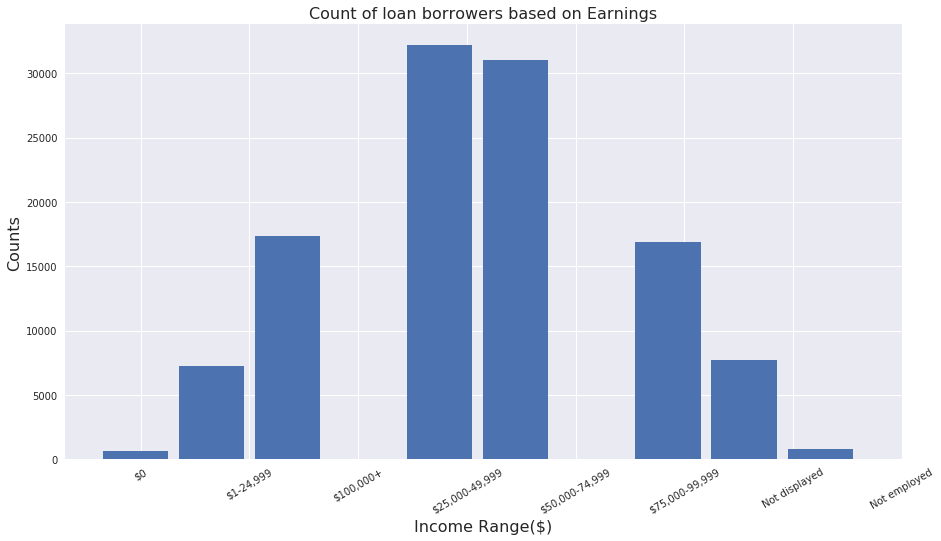

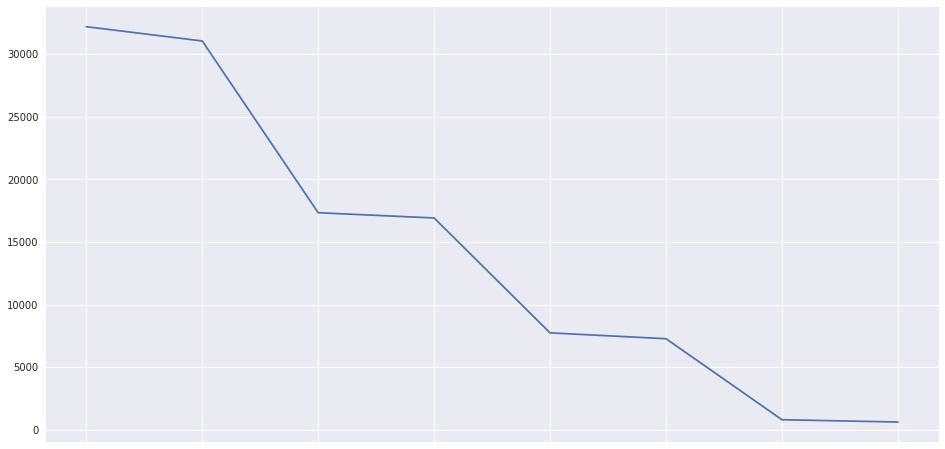

In [92]:
# a histplot showing the number of loan borrowers based on earnings
histplot(df_1["IncomeRange"], "Income Range($)", "Counts","Count of loan borrowers based on Earnings")

# The same plot using direct pandas plot
plt.figure(figsize=(16,8))
df_1['IncomeRange'].value_counts().plot()
plt.xticks(rotation=90);

#### From the two plots shown above, it can be clearly seen that the earners in the range 25,000 -  49,000(dollars) have the highest rate of loan collection. While the distribution is way more lower for the non-earners and the earners in the range 1 - 24,999(dollars) which might be due to their _low income_.

#### 2.The most common reasons why most people get loan.
        - Does this have anything to do with low-income?

#### 
1. There are numerous reasons as to why different people get loans. The categories are listed below:
     - The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

- First let's try and see a plot of the count of the reasons why people get a loan

In [93]:
# Lets make a copy of the data and change the categories from numeric to string...
reasons_df = df_1.copy()
# Renaming the ListingCategory column.
reasons_df["ListingCategory (numeric)"] = reasons_df.rename({"ListingCategory (numeric)":"ListingCategory"},axis=1, inplace=True)
# reasons_df["ListingCategory"]
# Making a dictionary of the column values to change.
reasons_dict = {0 : "Not Available", 1 : "Debt Consolidation", 2 : "Home Improvement", 3 : "Business",
                4 : "Personal Loan", 5 : "Student Use", 6 : "Auto", 7 : "Other", 8 : "Baby&Adoption",
                9 : "Boat", 10 : "Cosmetic Procedure", 11 : "Engagement Ring", 12 : "Green Loans",
                13 : "Household Expenses", 14 : "Large Purchases", 15 : "Medical/Dental",
                16 : "Motorcycle", 17 : "RV", 18 : "Taxes", 19 : "Vacation", 20 : "Wedding Loans"}

# using pandas .replace method to replace the values.
reasons_df = reasons_df.replace(reasons_dict)
# checking....
reasons_df["ListingCategory"].value_counts()

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory, dtype: int64

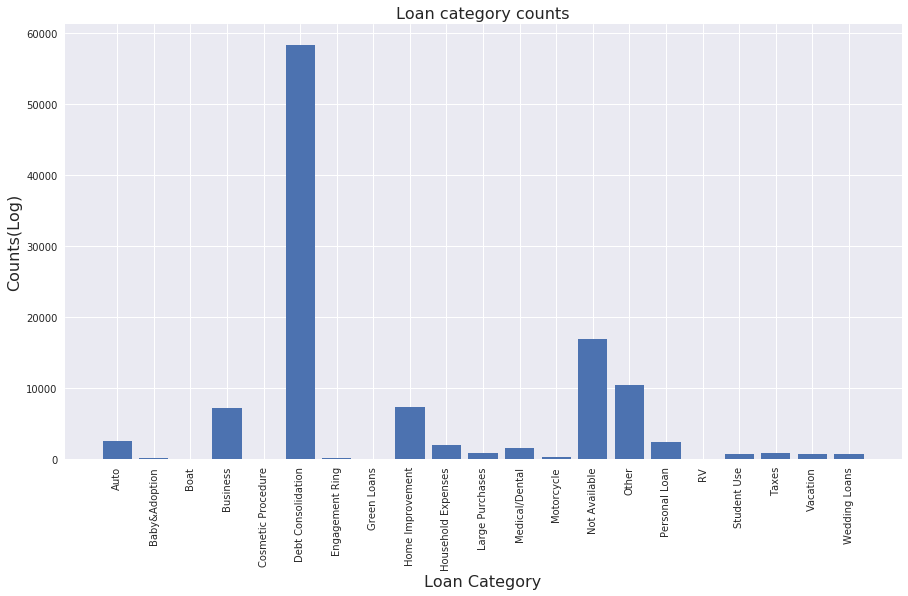

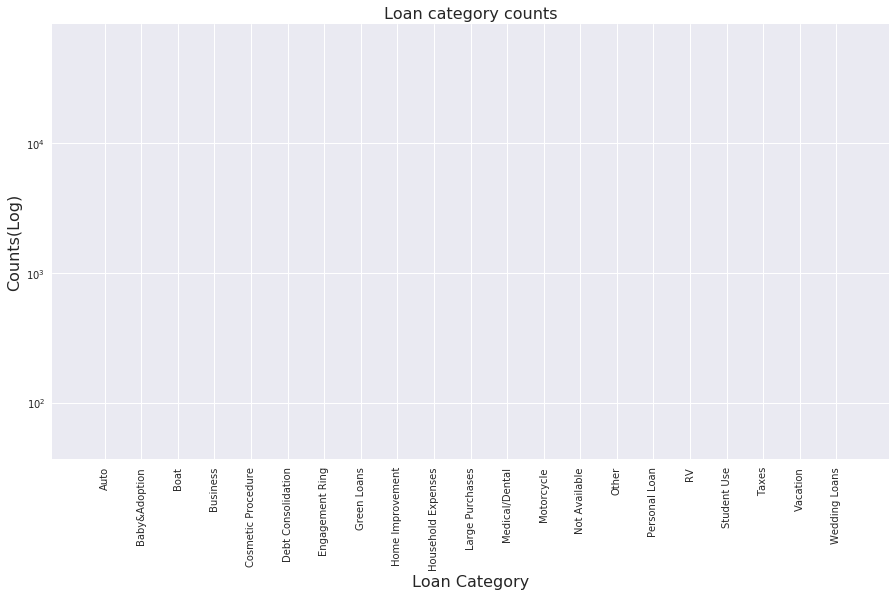

In [94]:
# plotting our graph..
dict_val = reasons_df["ListingCategory"].value_counts()
dict_val =  dict(dict_val)

#Barplot
barplot(dict_val.keys(), dict_val.values(),"Loan Category","Counts(Log)","Loan category counts")

# Barplot on a logarithm scale
barplot_log(dict_val.keys(), dict_val.values(),"Loan Category","Counts(Log)","Loan category counts")

#### From the above barplots, it is evident that Debt consolidation has the highest value followed by unknown and others. And RV in the last place.  From the first plot there are some values that are not visible because of their relative small values. So a __"Log scale"__ was used so as to cover for the non-visible values.
#### This is visible by comparing both plots.

#### 3. Plotting and checking for the cummulative amount of loans gotten __with respect to__ some other variables in the dataset.
- With Month.
- With Year.

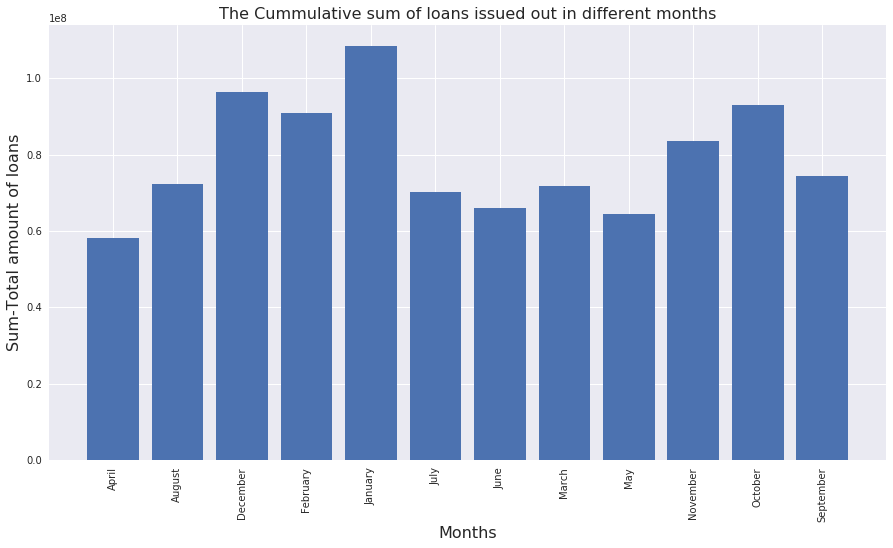

In [95]:
# Making a copy pof our dataset.
months = df_1.copy()

# Grouping by Month.
months.groupby("LoanOriginationMonth")["LoanOriginalAmount"].mean()

# Changing our moths column form numeric into categorical for easier visibility.
ticks = {1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",
         9:"September",10:"October",11:"November",12:"December"}

# Replacing  with our new categorical variables.
months["LoanOriginationMonth"] = months["LoanOriginationMonth"].replace(ticks)
loan_months = months.groupby("LoanOriginationMonth")["LoanOriginalAmount"].sum()
loan_months = dict(loan_months)

# Plotting our graph. 
barplot(loan_months.keys(),loan_months.values(), "Months","Sum-Total amount of loans",
        "The Cummulative sum of loans issued out in different months")

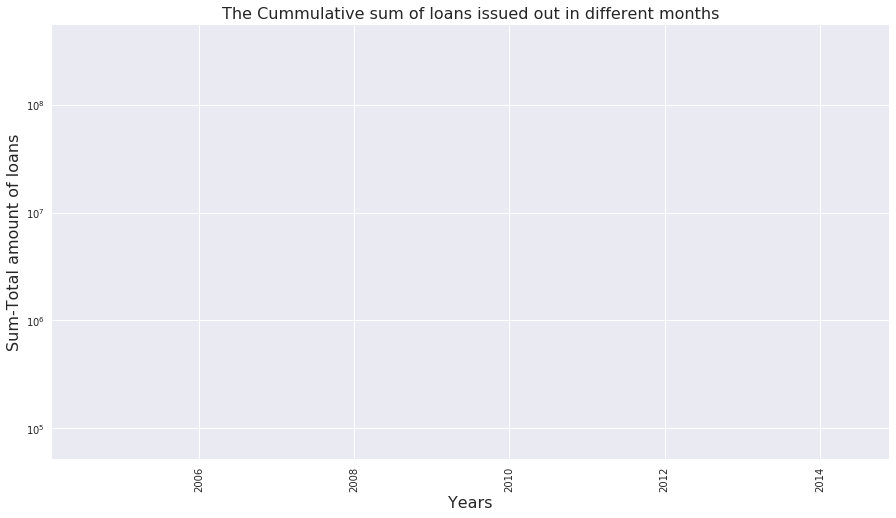

dict_keys([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])

In [96]:
# Making a copy pof our dataset.
years = df_1.copy()

# Grouping by Year.
loan_years = years.groupby("LoanOriginationYear")["LoanOriginalAmount"].sum()
loan_years = dict(loan_years)

# Plotting our graph. 
barplot_log(loan_years.keys(),loan_years.values(), "Years","Sum-Total amount of loans",
        "The Cummulative sum of loans issued out in different months")
loan_years.keys()

#### Note:
   - We do make a copy of our cleaned dataset whenever we are plotting any graph. This is to make sure that our dataset remains intact in case of any modifications made to it.

#### 4. The occupation with the most loan acquisition.

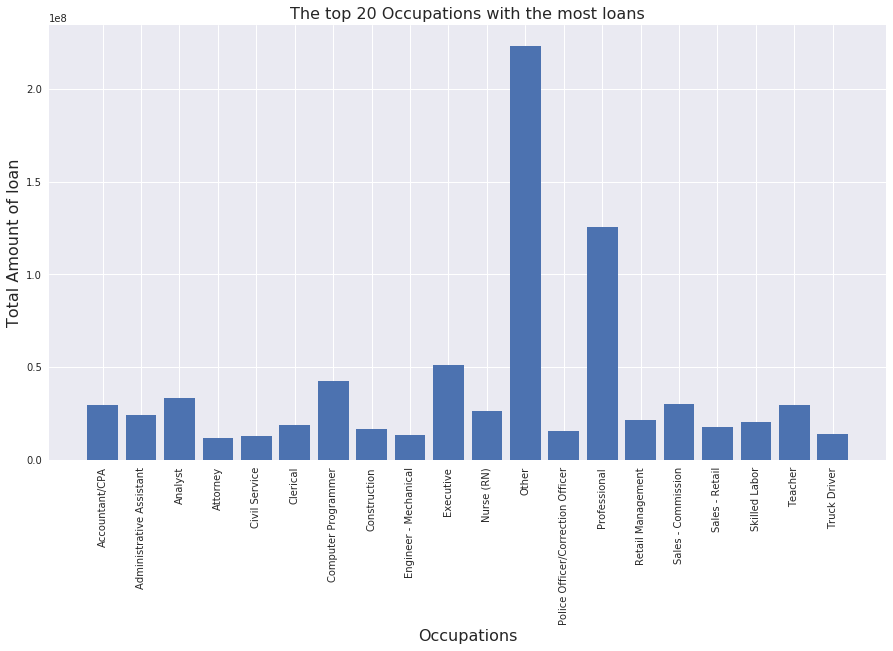

In [97]:
# Importing itertools
import itertools

# Group our data by Occupation to see the occupation with thye highest amount of loans.
a = df_1.groupby("Occupation")["LoanOriginalAmount"].sum()

# Changing this into a dictionary.
a = a.to_dict()

# Sorting our dictionary with itertools.
sorted_occupations = sorted(a.items(),key=lambda x:x[1],reverse=True)

# Changing our generated list back into a dictionary.
sorted_occupations = dict(sorted_occupations)

# Slicing the top 20 as the number of occupation is way more than what our graph can take..
top_20_loaned_occupations = dict(itertools.islice(sorted_occupations.items(), 20))

#Ploting our graph using a barplot..

barplot(top_20_loaned_occupations.keys(),top_20_loaned_occupations.values(),
        "Occupations","Total Amount of loan","The top 20 Occupations with the most loans")

#### The above plot shows clearly the Top 20 occupations that take loans. And the chart makes it visible that teachers, accountants, computer programmers, analyst, nurses are part of the top 20 occupations.

- What to note: 
    - We made use of itertools library to slice our sorted dictionary and, we converted back to dictionary format with the dict method as the itertools library returns a list.
    - We didn't use the log as our yscale this time around as the chart is clearly visible and there are no much difference between our log scale and the default linear scale this time around.

#### 5. The correlation between the employment status and loan acquisition.
- Questions:
    - What percentage of the total sum goes to the employed people ?
    - What percentage goes to the self employed ?
    - How well do retired people acquire loans ?

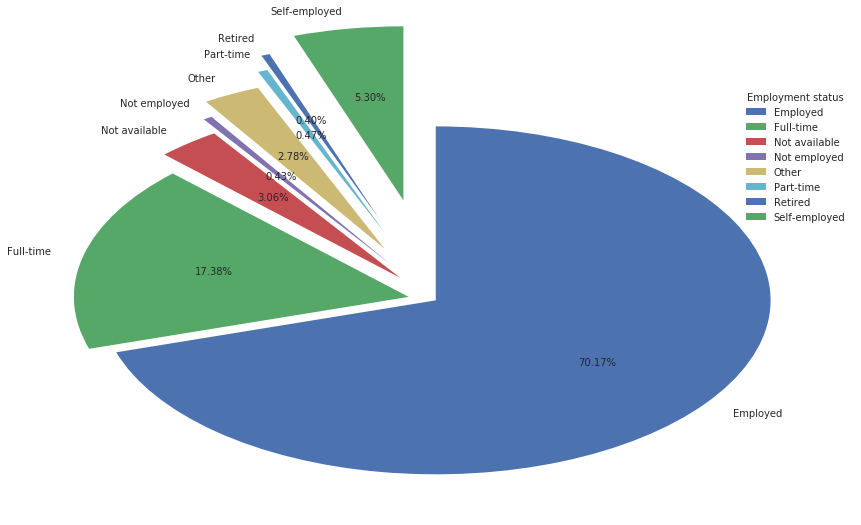

In [98]:
# The comparison between the loans acquired by employed people and the unemployed people.
employment = df_1.copy()
distribution = employment.groupby("EmploymentStatus")["LoanOriginalAmount"].sum()
# Dict format for the group.
distribution = dict(distribution)

distro_keys = list(distribution.keys())
distro_val = list(distribution.values())
#Pie chart
pie_chart(distro_val,distro_keys,"Employment status")

#### 
- From the above plot, it can be deduced that:
    - About 70% of the loan aamount goes to the employed people.
    - Aboout 5.3% goes to the self employed.
    - Retired people are the least of them.
    
- To be investigated:
    - Why is the percentage the goes to the unemployed people so small ?

### __BIVARIATE EXPLORATION.__

#### 1. Relationship between high-paying jobs and loan acquisition.
- Question(s):
    - Does high paying job makes people get loans with the assurance of paying it back or otherwise ?
    

In [99]:
df_1.head()

,ListingKey,ListingCreationDate,Investors,LoanOriginationDate,LoanOriginalAmount,LoanMonthsSinceOrigination,IncomeRange,BorrowerState,Occupation,EmploymentStatus,...,LoanStatus,TotalProsperLoans,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,BorrowerRate,Term,LoanOriginationYear,LoanOriginationMonth,LoanOriginationDay
0,1021339766868145413AB3B,2007-08-26,258,2007-09-12,9425,78,"$25,000-49,999",CO,Other,Self-employed,...,Completed,NaN,NaN,NaN,NaN,0.1580,36,2007,9,12
1,10273602499503308B223C1,2014-02-27,1,2014-03-03,10000,0,"$50,000-74,999",CO,Professional,Employed,...,Current,NaN,NaN,NaN,NaN,0.0920,36,2014,3,3
2,0EE9337825851032864889A,2007-01-05,41,2007-01-17,3001,86,Not displayed,GA,Other,Not available,...,Completed,NaN,NaN,NaN,NaN,0.2750,36,2007,1,17
3,0EF5356002482715299901A,2012-10-22,158,2012-11-01,10000,16,"$25,000-49,999",GA,Skilled Labor,Employed,...,Current,NaN,NaN,NaN,NaN,0.0974,36,2012,11,1
4,0F023589499656230C5E3E2,2013-09-14,20,2013-09-20,15000,6,"$100,000+",MN,Executive,Employed,...,Current,1.0,11.0,0.0,0.0,0.2085,36,2013,9,20


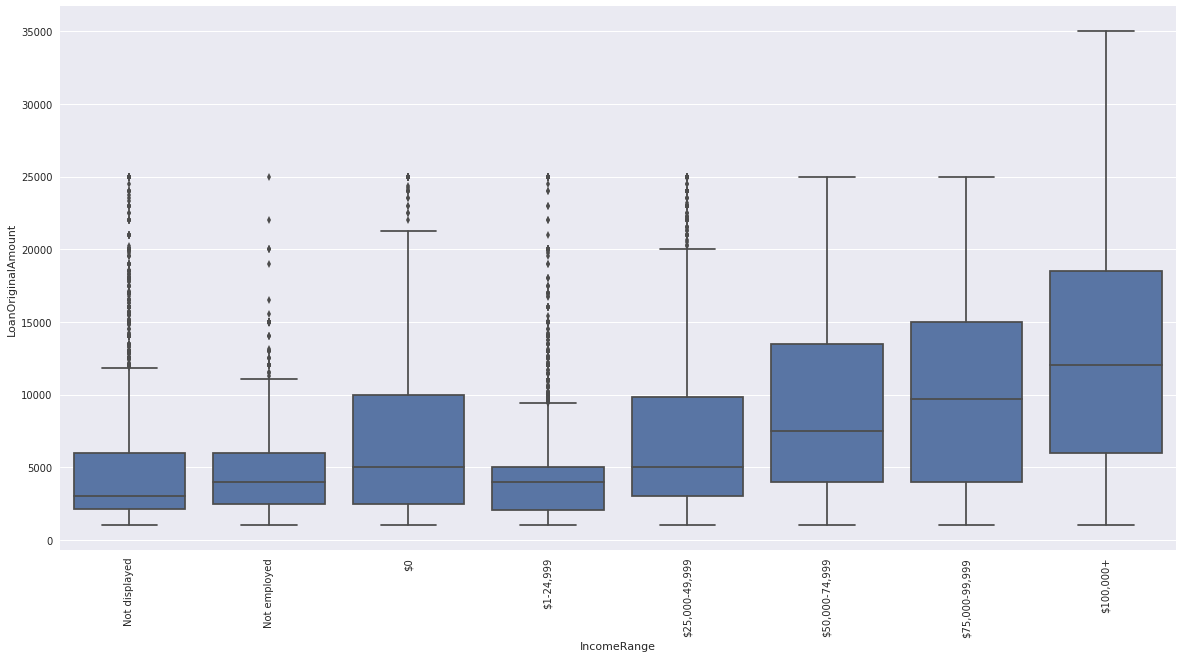

In [100]:
# Checking our data by grouping by both IncomeRange and Occupation

# Make a copy of our data
bi_new = df_1.copy()
order = list(bi_new["Occupation"].unique())

# Setting this to a single color to avoid unnecessary visual info /junks 
sns.set(rc = {'figure.figsize':(20,10)})
color = sns.color_palette()[0]

# Categorical plot(Box)
sns.boxplot(data=bi_new,x="IncomeRange",y="LoanOriginalAmount",color=color)
plt.xticks(rotation=90)
plt.show();

#### From the above box plot:
- It can be deduced that:
    - There is a significant trend/ correlation between the money loaned and the Income Range
        - The mean of the amount increases with increase in the range of amount earned.
    - There are also some outliers on some of the income range(unexpected high value for low income).
       - This is expected as it might be due to the duration given to pay back the loan.
       
NB:
    - A boxplot was used so the mean value can be clearly shown.

In [101]:
## Income range
## Occupation
# Plotting a graph to check the correlation of both

#### 2. What are the relationship between the  numeric variables?

In [102]:
# Seelecting columns(numeric) to check the correlation and distribution.
# Numerical variables columns 
column_numeric = ["Investors",
       'LoanOriginalAmount',
       'ListingCategory (numeric)', 'Term',
        'TotalProsperLoans', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate']

# Categorical variables columns
column_categorical = ['IncomeRange',  'LoanMonthsSinceOrigination',
       'BorrowerState', 'Occupation', 'EmploymentStatus','LoanStatus', 'BorrowerRate',
       'LoanOriginationYear', 'LoanOriginationMonth', 'LoanOriginationDay']

# numeric dataframe
distro = bi_new.copy()
distro_num = distro[column_numeric]

# categorical dataframe
distro_cat = distro[column_categorical]
distro_num.head()

,Investors,LoanOriginalAmount,ListingCategory (numeric),Term,TotalProsperLoans,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate
0,258,9425,0,36,NaN,NaN,NaN,NaN
1,1,10000,2,36,NaN,NaN,NaN,NaN
2,41,3001,0,36,NaN,NaN,NaN,NaN
3,158,10000,16,36,NaN,NaN,NaN,NaN
4,20,15000,2,36,1.0,11.0,0.0,0.0


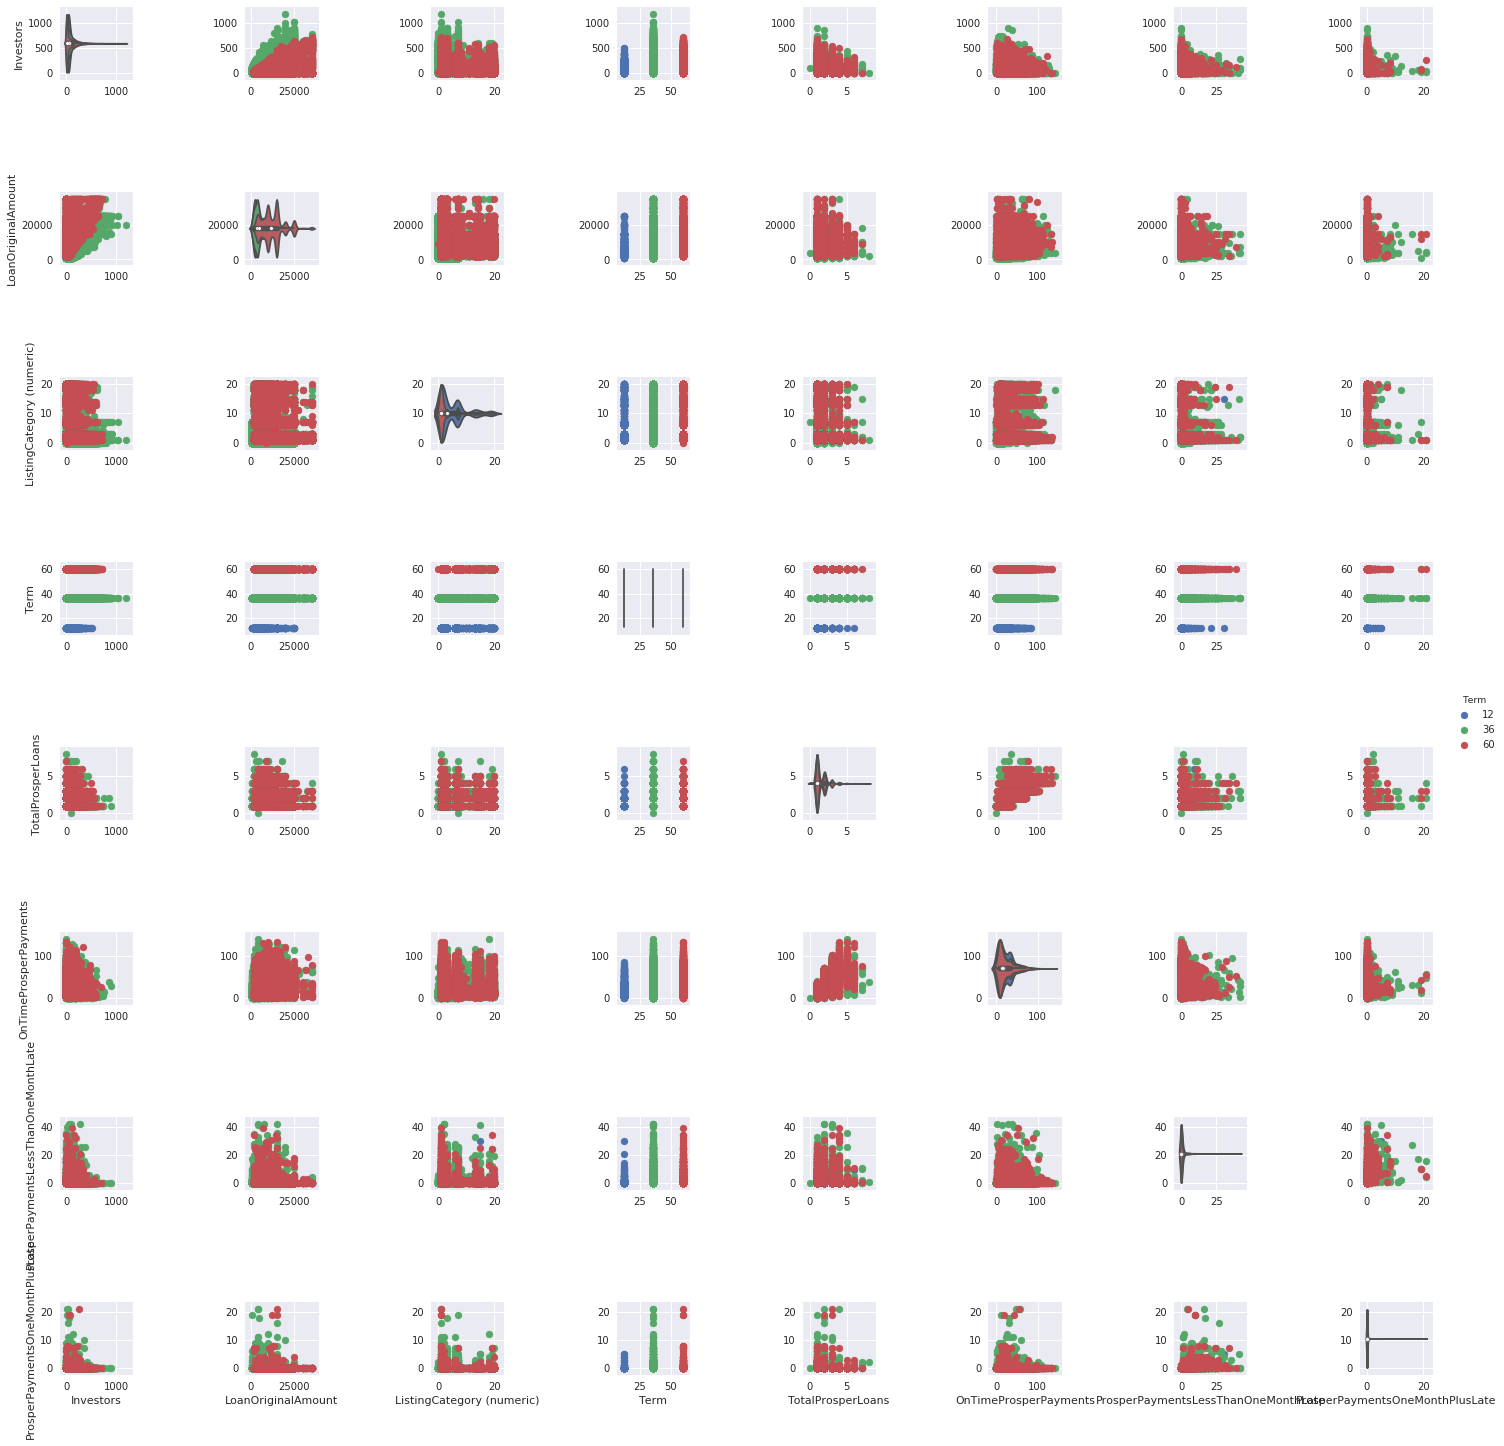

In [103]:
# PairGrid showing the relationship between some numerical columns
p = sns.PairGrid(distro_num,hue="Term",dropna=True)
# A histplot to the diagonals
p.map_diag(sns.violinplot)
# Scatterplot to the off diagonals
p.map_offdiag(plt.scatter)
p.add_legend()
plt.show();

#### From the above PairGrid plot for multiple numeric variables:
    - There are some correlations between some numeric variables(even though are too tiny to see because of the number of variables being plotted together.
- NB :
    - A categorical variable(Term) has been used as a hue for the PairGrid.
- To do:
    - Take a closer look into the pair of variables to derive some insights.

#### 3. Does any relationship exist between the number of investors and the LoanOriginalAmount ?

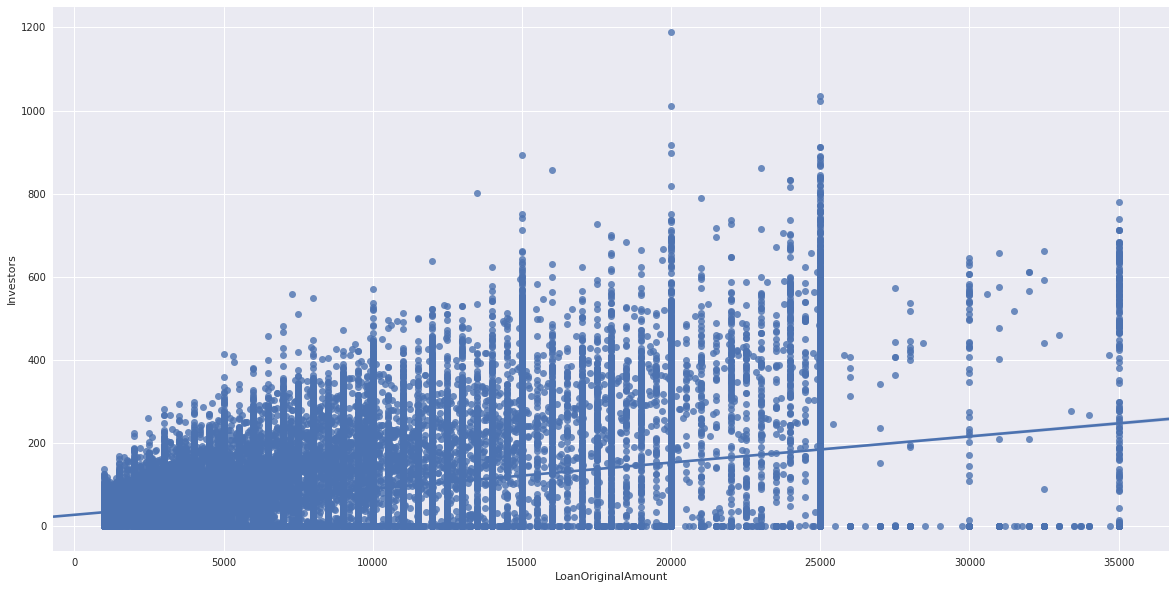

In [108]:
# Exploring the relationship between the TotalLoan and the onTime payments
#Using seaborn's countplot
sns.regplot(data = distro, x="LoanOriginalAmount",
                y="Investors")

#### The plot above shows the relationship between the numeric variables mentioned above.
- Seems the number of investors increases with the amount of loan.
- Even though there are little outliers.

#### 4. Question(s):
- For what reason(s) do most people acquire loan?
    - What effect does the income have on the reason(s)? 

In [109]:
# renaming our BorrowerRate column.

# Setting our bins for the range.
bins = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
# Setting labels for the bins above.
labels = ["0.000000-0.0999999%", "0.100000-0.199999%", "0.200000-0.299999%",
          "0.300000-0.399999%", "0.400 000-0.499999%"]
# Using pandas cut to rename our column.
distro["BorrowerRate"] = pd.cut(x=distro["BorrowerRate"],bins=bins, labels=labels)
# Quick Check.
distro.head()

,ListingKey,ListingCreationDate,Investors,LoanOriginationDate,LoanOriginalAmount,LoanMonthsSinceOrigination,IncomeRange,BorrowerState,Occupation,EmploymentStatus,...,LoanStatus,TotalProsperLoans,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,BorrowerRate,Term,LoanOriginationYear,LoanOriginationMonth,LoanOriginationDay
0,1021339766868145413AB3B,2007-08-26,258,2007-09-12,9425,78,"$25,000-49,999",CO,Other,Self-employed,...,Completed,NaN,NaN,NaN,NaN,0.100000-0.199999%,36,2007,9,12
1,10273602499503308B223C1,2014-02-27,1,2014-03-03,10000,0,"$50,000-74,999",CO,Professional,Employed,...,Current,NaN,NaN,NaN,NaN,0.000000-0.0999999%,36,2014,3,3
2,0EE9337825851032864889A,2007-01-05,41,2007-01-17,3001,86,Not displayed,GA,Other,Not available,...,Completed,NaN,NaN,NaN,NaN,0.200000-0.299999%,36,2007,1,17
3,0EF5356002482715299901A,2012-10-22,158,2012-11-01,10000,16,"$25,000-49,999",GA,Skilled Labor,Employed,...,Current,NaN,NaN,NaN,NaN,0.000000-0.0999999%,36,2012,11,1
4,0F023589499656230C5E3E2,2013-09-14,20,2013-09-20,15000,6,"$100,000+",MN,Executive,Employed,...,Current,1.0,11.0,0.0,0.0,0.200000-0.299999%,36,2013,9,20


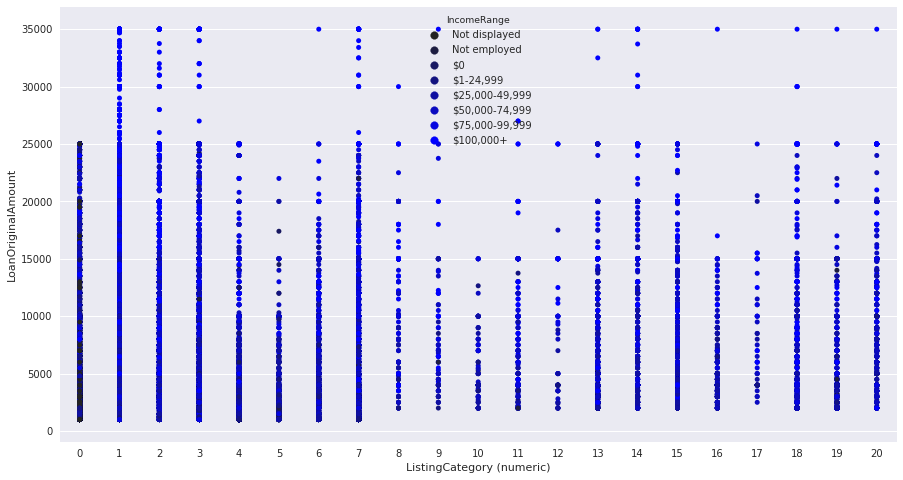

In [111]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.stripplot(data=distro, x="ListingCategory (numeric)", y="LoanOriginalAmount",
            color="blue",hue="IncomeRange")

#### Answer(s):
- It is evident from the above strip plot that the reason with the most occurence as to why people acquire loan is the reason(1) which is "debt consolidation".
    - The income range seem to have a significant effect on the reason -
        - Higher income range are being seen with respect to the most reason for loan acquisition.

#### 5. What effect does the loan status have on the amount of loan given with respect to income range?

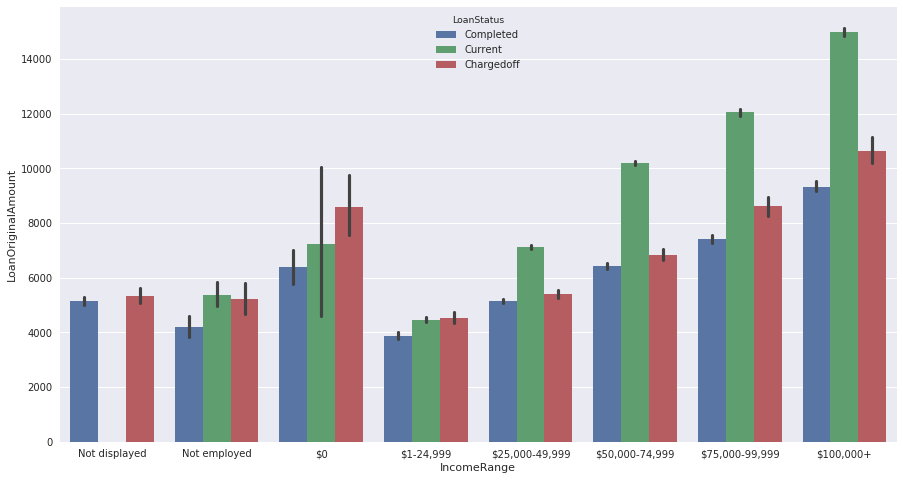

In [112]:
# Make a copy of our data.
df_new = bi_new.copy()
# Cutting the loan status categories down to the 3 most important/effective variables.
status = df_new[df_new["LoanStatus"].isin(["Completed","Current","Chargedoff"])]
# using seaborn's barplot with loan status as hue.
sns.barplot(data=status,x="IncomeRange",y="LoanOriginalAmount", hue="LoanStatus")

- In the above plot it is shown that:
    - the loan which goes to the individuals with complete loan status is the highest for the highest salary range. This might be due to the high income range that enables them to pay frequently than the others.

### __MULTIVARIATE EXPLORATION__

#### 1. How well does the interest rate correlate with the amount loaned and does the salary have any impact on this or does the number of late/ ontime payment have a significant effect ?



In [113]:
df_1.head()

,ListingKey,ListingCreationDate,Investors,LoanOriginationDate,LoanOriginalAmount,LoanMonthsSinceOrigination,IncomeRange,BorrowerState,Occupation,EmploymentStatus,...,LoanStatus,TotalProsperLoans,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,BorrowerRate,Term,LoanOriginationYear,LoanOriginationMonth,LoanOriginationDay
0,1021339766868145413AB3B,2007-08-26,258,2007-09-12,9425,78,"$25,000-49,999",CO,Other,Self-employed,...,Completed,NaN,NaN,NaN,NaN,0.1580,36,2007,9,12
1,10273602499503308B223C1,2014-02-27,1,2014-03-03,10000,0,"$50,000-74,999",CO,Professional,Employed,...,Current,NaN,NaN,NaN,NaN,0.0920,36,2014,3,3
2,0EE9337825851032864889A,2007-01-05,41,2007-01-17,3001,86,Not displayed,GA,Other,Not available,...,Completed,NaN,NaN,NaN,NaN,0.2750,36,2007,1,17
3,0EF5356002482715299901A,2012-10-22,158,2012-11-01,10000,16,"$25,000-49,999",GA,Skilled Labor,Employed,...,Current,NaN,NaN,NaN,NaN,0.0974,36,2012,11,1
4,0F023589499656230C5E3E2,2013-09-14,20,2013-09-20,15000,6,"$100,000+",MN,Executive,Employed,...,Current,1.0,11.0,0.0,0.0,0.2085,36,2013,9,20


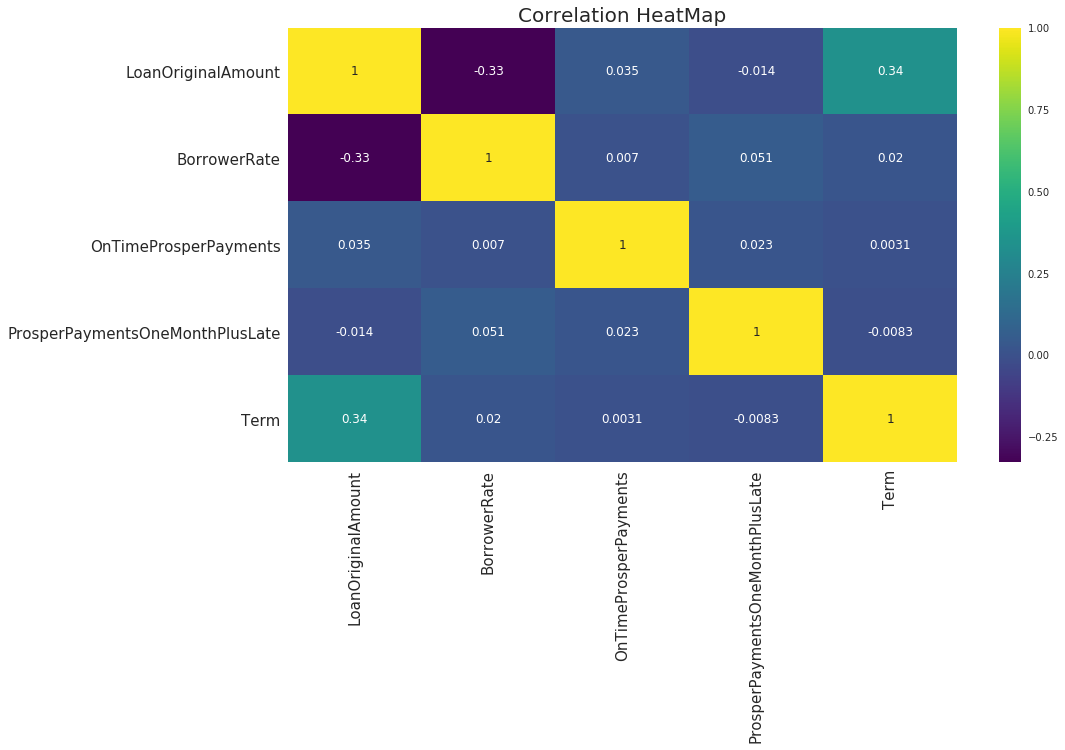

In [114]:
interest = df_1.copy()
interest_list = ["LoanOriginalAmount","BorrowerRate","OnTimeProsperPayments",
                 "ProsperPaymentsOneMonthPlusLate","Term"]
interest_new = interest[interest_list]

# Firstly checking for the correlation between these variables. 
interest_new = interest_new.corr()

# Plotting this on a heatMap
sns.set(rc = {'figure.figsize':(15,8)})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Correlation HeatMap",fontsize=20)
sns.heatmap(interest_new, cmap="viridis", annot=True)
plt.show();

#### From the above HeatMap:
- It can be deduced that:
    - There is a very little correlation between the listed variable.
    - There is a small correlation between loan amount and Term given.

#### 2. Relationship between the borrower rate and the loan original amount and the effect of the loan term given on each.

In [115]:
# renaming our Borrowerate column.

# Setting our bins for the range.
bins = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
# Setting labels for the bins above.
labels = ["0.000000-0.0999999%", "0.100000-0.199999%", "0.200000-0.299999%",
          "0.300000-0.399999%", "0.400 000-0.499999%"]
# Using pandas cut to rename our column.
interest["BorrowerRate"] = pd.cut(x=interest["BorrowerRate"],bins=bins, labels=labels)
# Quick Check.
interest

,ListingKey,ListingCreationDate,Investors,LoanOriginationDate,LoanOriginalAmount,LoanMonthsSinceOrigination,IncomeRange,BorrowerState,Occupation,EmploymentStatus,...,LoanStatus,TotalProsperLoans,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,BorrowerRate,Term,LoanOriginationYear,LoanOriginationMonth,LoanOriginationDay
0,1021339766868145413AB3B,2007-08-26,258,2007-09-12,9425,78,"$25,000-49,999",CO,Other,Self-employed,...,Completed,NaN,NaN,NaN,NaN,0.100000-0.199999%,36,2007,9,12
1,10273602499503308B223C1,2014-02-27,1,2014-03-03,10000,0,"$50,000-74,999",CO,Professional,Employed,...,Current,NaN,NaN,NaN,NaN,0.000000-0.0999999%,36,2014,3,3
2,0EE9337825851032864889A,2007-01-05,41,2007-01-17,3001,86,Not displayed,GA,Other,Not available,...,Completed,NaN,NaN,NaN,NaN,0.200000-0.299999%,36,2007,1,17
3,0EF5356002482715299901A,2012-10-22,158,2012-11-01,10000,16,"$25,000-49,999",GA,Skilled Labor,Employed,...,Current,NaN,NaN,NaN,NaN,0.000000-0.0999999%,36,2012,11,1
4,0F023589499656230C5E3E2,2013-09-14,20,2013-09-20,15000,6,"$100,000+",MN,Executive,Employed,...,Current,1.0,11.0,0.0,0.0,0.200000-0.299999%,36,2013,9,20
5,0F05359734824199381F61D,2013-12-14,1,2013-12-24,15000,3,"$100,000+",NM,Professional,Employed,...,Current,NaN,NaN,NaN,NaN,0.100000-0.199999%,60,2013,12,24
6,0F0A3576754255009D63151,2013-04-12,1,2013-04-18,3000,11,"$25,000-49,999",KS,Sales - Retail,Employed,...,Current,NaN,NaN,NaN,NaN,0.200000-0.299999%,36,2013,4,18
7,0F1035772717087366F9EA7,2013-05-05,1,2013-05-13,10000,10,"$25,000-49,999",CA,Laborer,Employed,...,Current,NaN,NaN,NaN,NaN,0.200000-0.299999%,36,2013,5,13
8,0F043596202561788EA13D5,2013-12-02,1,2013-12-12,10000,3,"$25,000-49,999",IL,Food Service,Employed,...,Current,NaN,NaN,NaN,NaN,0.000000-0.0999999%,36,2013,12,12
9,0F043596202561788EA13D5,2013-12-02,1,2013-12-12,10000,3,"$25,000-49,999",IL,Food Service,Employed,...,Current,NaN,NaN,NaN,NaN,0.000000-0.0999999%,36,2013,12,12


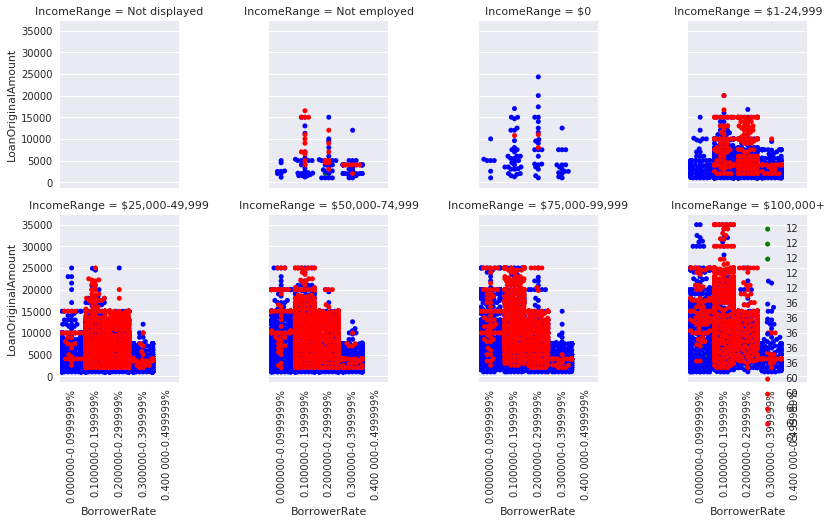

In [119]:
# Using a Facet Grid and Checking for the relationship, 
# and distribution of loan amounts with respect to BorroweRate grouped by Terms.

sns.set(rc = {'figure.figsize':(15,8)})
g = sns.FacetGrid(data = interest, col="IncomeRange",hue = "Term",
                  palette=["green", "blue", "red"],col_wrap=4)
g.map_dataframe(sns.swarmplot, "BorrowerRate","LoanOriginalAmount")
g.set_xticklabels(rotation=90)
plt.legend()
plt.show();

#### 4. Across all states, what effect does income range have on the loan amount ?

In [120]:
# Making a copy of the dataset
df_st = df_1.copy()

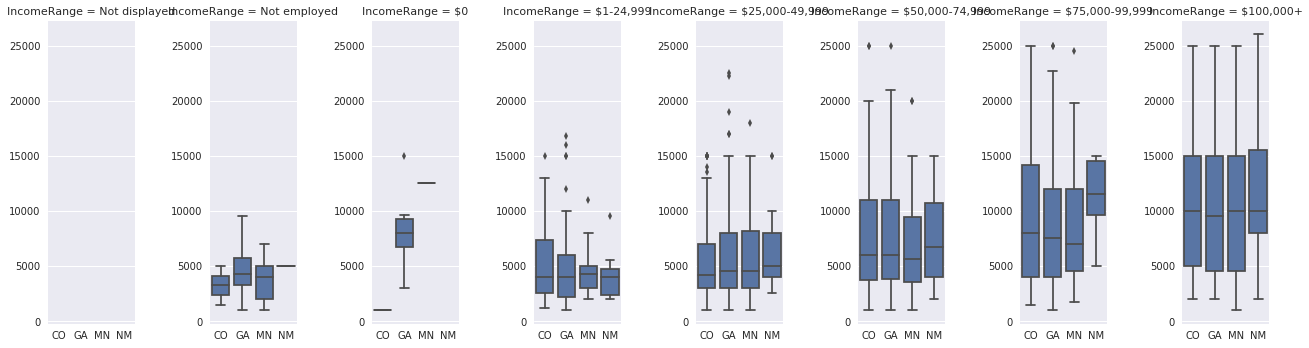

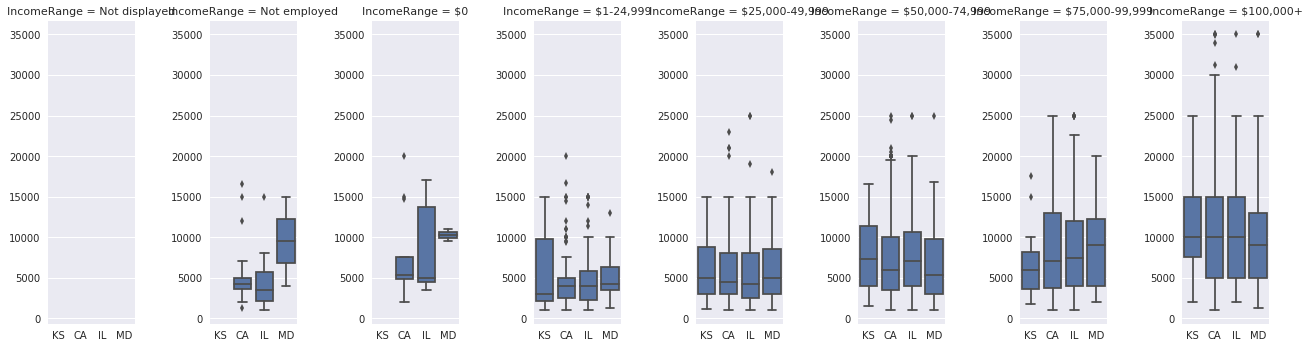

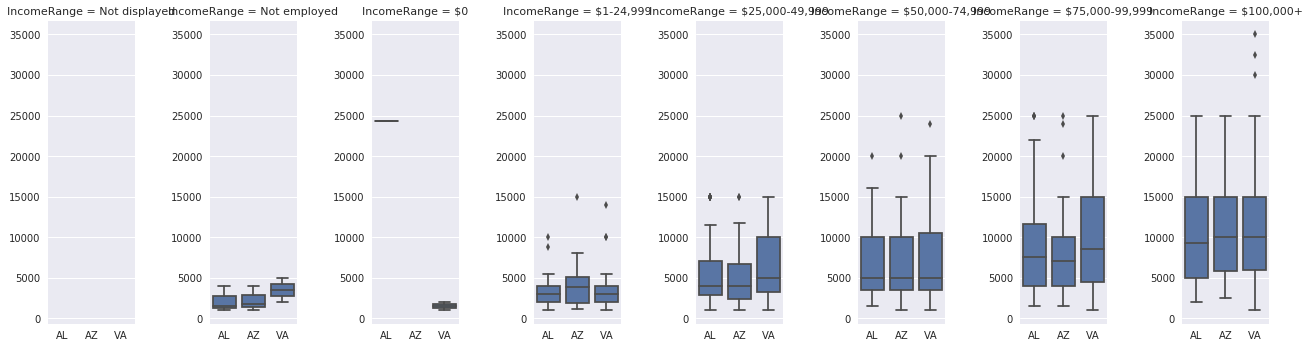

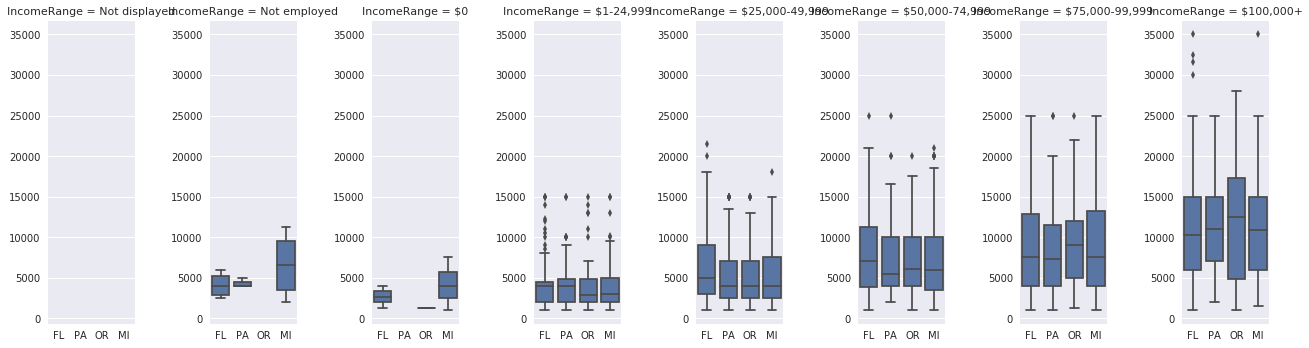

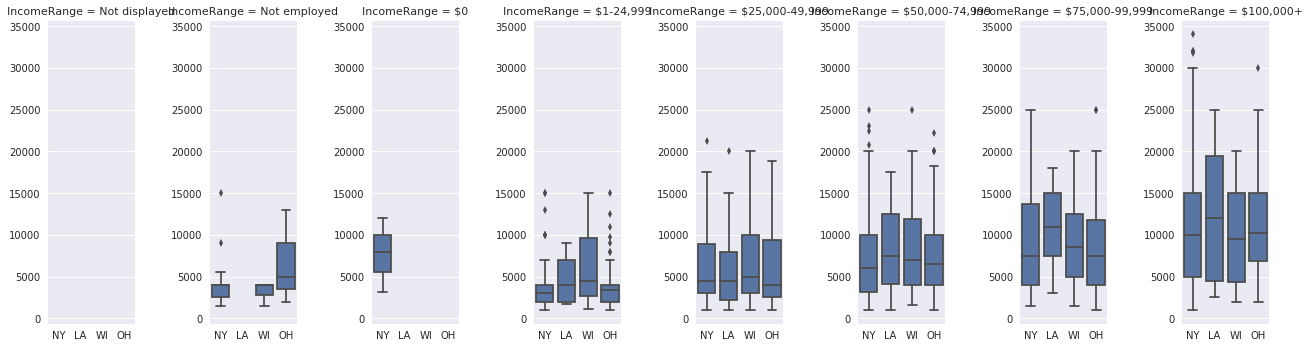

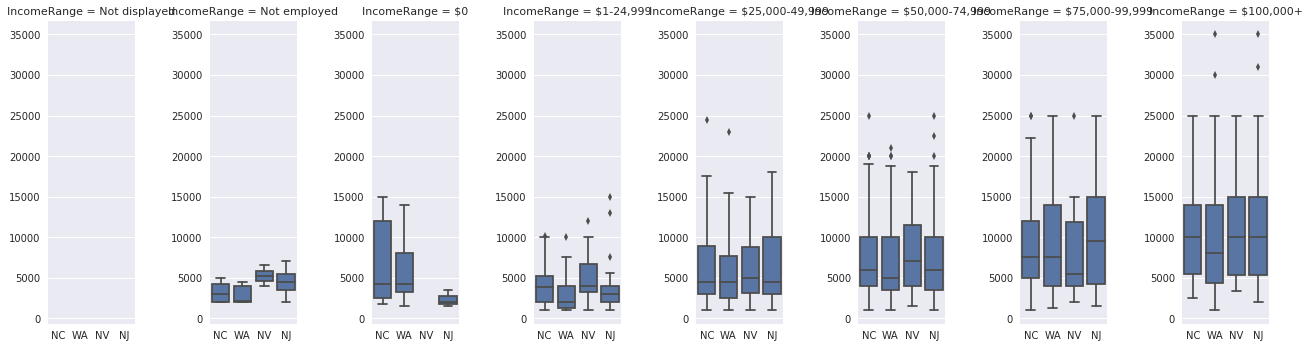

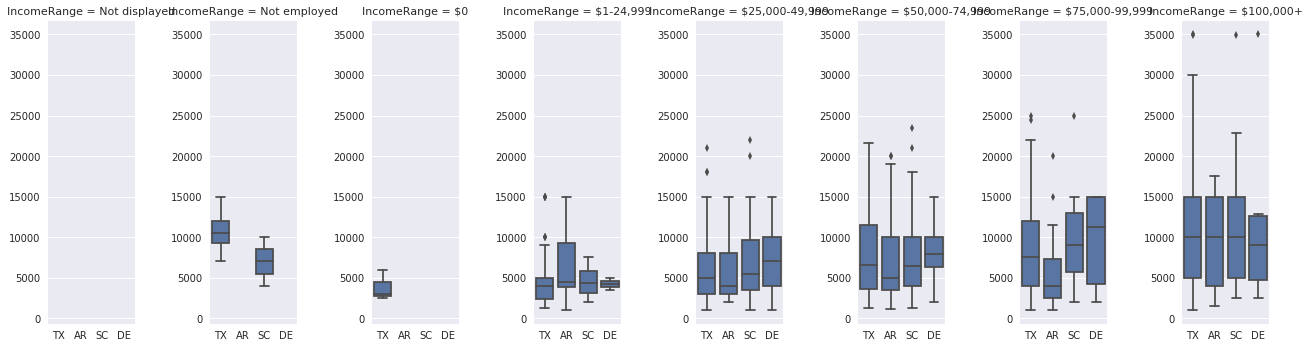

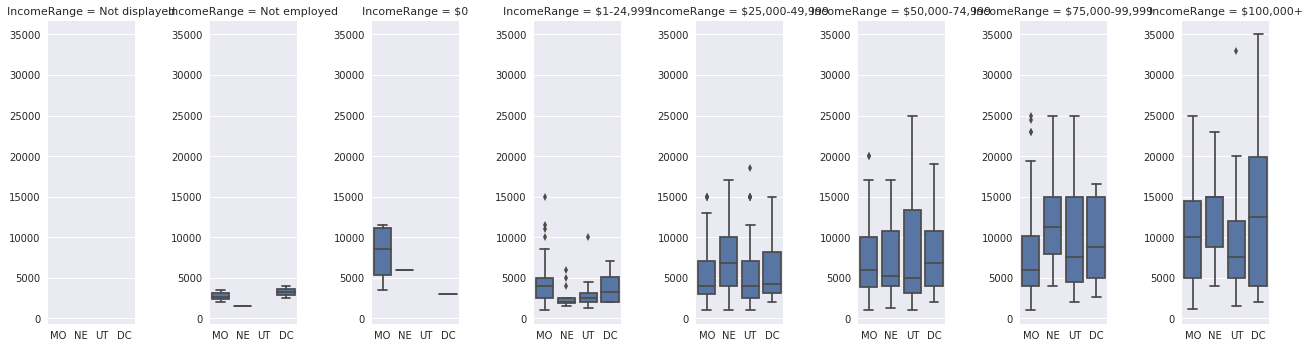

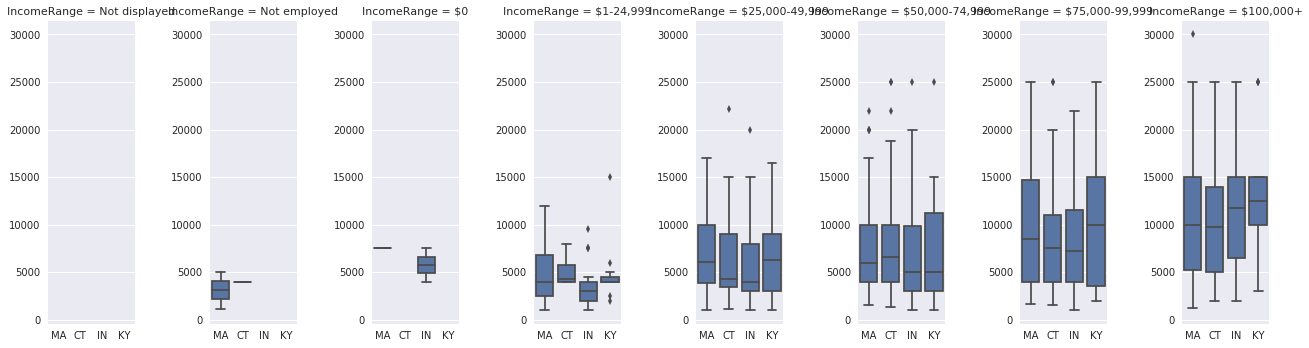

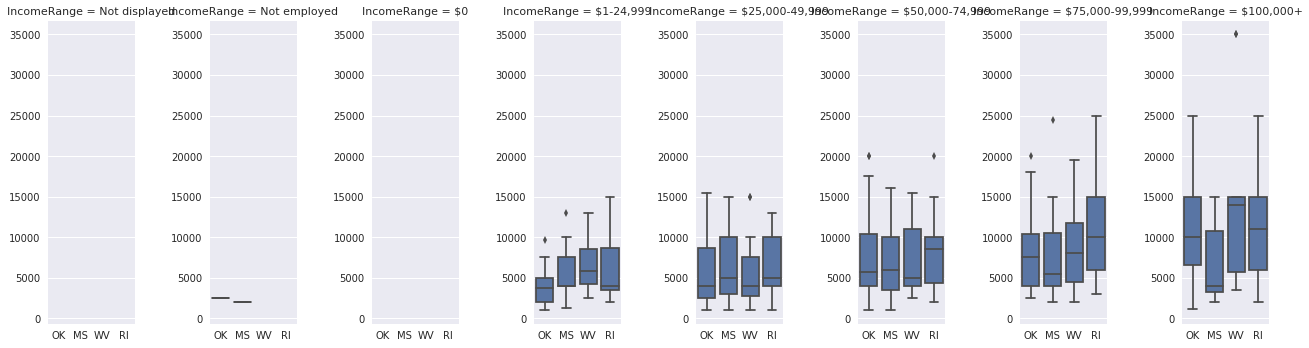

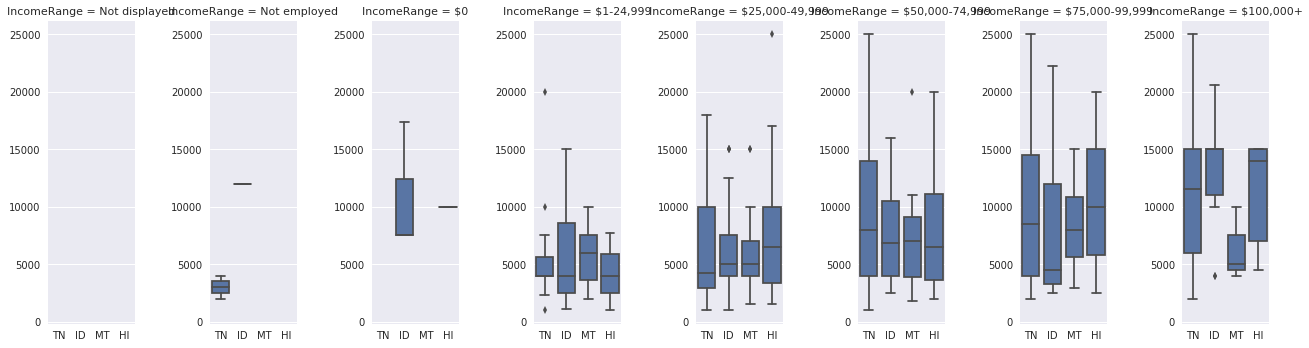

In [ ]:
states = df_st.BorrowerState.unique()
list_state = list(states)
list_state
# Run a for loop to loop through all the states in list_state..
for i in range(13):
    # Setting up the axes.
    axs = sns.FacetGrid(data=df_st,col="IncomeRange")
    
    # A bigger graph
    fig = plt.gcf()
    # Change seaborn plot size
    fig.set_size_inches(18,5)
    
    # Selecting the states in steps of 4 throughout the whole state list.
    X = df["BorrowerState"][df_st["BorrowerState"].isin(list_state[(i*4):(i+1)*4])]
    # Using a boxplot for thw whole Grid
    axs.map_dataframe(sns.boxplot,x=X,y="LoanOriginalAmount")
    plt.show();

#### NB:
- A for loop was used to loop through all the states in list_states in steps of 4.
    - The number 4 was chosen because the whole state is 52 which is a multiple of 4 and therefore we generate a total of 13 graphs for the Grid.
    - To better compare what we needed to compare, it was necessary to go through all the states instead of picking states at random and plotting each differently which might cause unnecessary wasting of cells.
    - A box plot was chosen so as to clearly show the mean loan amount obtained and the outliers for each state and income range
#### From the FaceGrid above:
- It can be shown that:
    - For each income range(column) in each state, there are some significant threads:
        - While some are in form of increments(increasing order)
        - Some are in decreasing order(decrements).
        - Across all states the highest income range has the highest loan amount(with the exception of outliers). 

### _How well do the variables(both categorical and numerical) correlates generally?_
##     
#### The dataset has been stripped of some of the columns as there were originally __81__ columns in the dataset. __21__ of the most important have been selected and worked on to get geneate some insights.

#### According to the plots, there are some columns seem to have little correlation with each other while most of the columns have no correlations with eachother at all.

- The Loan amount and the Income range seem to have a little correlation.
- The Loan amount also seem to have little correlation with the employment status though there are some outliers.